<a href="https://colab.research.google.com/github/rohit9650/ML/blob/master/reuters_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [4]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in  word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

print(decode_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_label)

# one_hot_train_labels = to_categorical(train_label)
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = to_categorical(train_label)
y_test = to_categorical(test_label)

print(y_train[0])
print(x_train[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.4640 - acc: 0.5331 - val_loss: 1.6309 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.3407 - acc: 0.7225 - val_loss: 1.2559 - val_acc: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.0050 - acc: 0.7912 - val_loss: 1.1410 - val_acc: 0.7350
Epoch 4/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.8017 - acc: 0.8304 - val_loss: 1.0135 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.6361 - acc: 0.8659 - val_loss: 0.9848 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.5118 - acc: 0.8909 - val_loss: 0.9337 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.4116 - acc: 0.9110 - val_loss: 0.9220 - val_acc: 0.8010


In [18]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


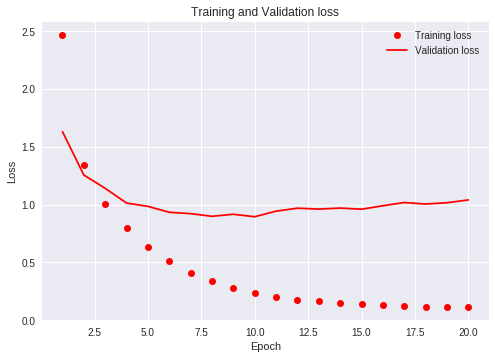

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['acc'])+1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show()

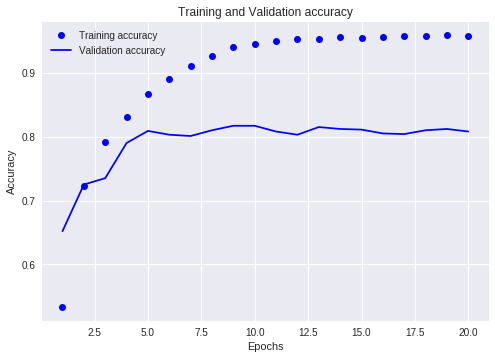

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(history.history['acc'])+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [25]:


model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=128,
         validation_data=(x_val, y_val))

result = model.evaluate(x_test, y_test)
print(result)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 278us/step - loss: 1.7804 - acc: 0.6227 - val_loss: 1.2057 - val_acc: 0.7220
Epoch 2/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.9235 - acc: 0.7999 - val_loss: 1.0037 - val_acc: 0.7840
Epoch 3/9
7982/7982 [==============================] - 2s 230us/step - loss: 0.6171 - acc: 0.8678 - val_loss: 0.9130 - val_acc: 0.7980
Epoch 4/9
7982/7982 [==============================] - 2s 236us/step - loss: 0.4274 - acc: 0.9085 - val_loss: 0.8634 - val_acc: 0.8210
Epoch 5/9
7982/7982 [==============================] - 2s 235us/step - loss: 0.3090 - acc: 0.9318 - val_loss: 0.8486 - val_acc: 0.8260
Epoch 6/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.2392 - acc: 0.9432 - val_loss: 0.9583 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 228us/step - loss: 0.2030 - acc: 0.9475 - val_loss: 0.9177 - val_acc: 0.8180
Epoch 8